In [112]:
import numpy as np
import netCDF4 as nc
import pylab as plt
import pandas as pd
import scipy.interpolate
import warnings
warnings.filterwarnings('ignore')

import xarray as xr
from datetime import datetime, date

data_dir = '/projects/awaken/j3lee/arm-data/'
# date = '20180610'
date = '20170628'

# forward time adjustment from 0 UTC in hours
hour_adj = 18
# length of simulation in hours
sim_length = 3

# Adjust flux data filename if needed

In [113]:
# SURFACE FLUX DATA FILE
# flx_file = 'sgpco2flx25mC1/sgpco2flx25mC1.b1.{}.001500.custom.nc'.format(date)
flx_file = 'sgpco2flx25mC1/sgpco2flx25mC1.b1.{}.001500.nc'.format(date)
flx = nc.Dataset(data_dir+flx_file)

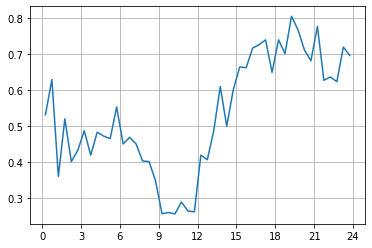

In [114]:
plt.plot(flx.variables['time'][:]/3600, flx.variables['friction_velocity'][:])
plt.xticks(np.arange(0,27,3))
plt.grid(True)

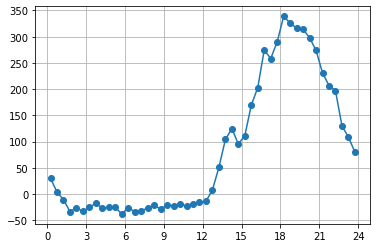

In [115]:
plt.plot(flx.variables['time'][:]/3600, flx.variables['sensible_heat_flux'][:], '-o')
plt.xticks(np.arange(0,27,3))
plt.grid(True)

# Adjust simulation start time if needed

In [116]:
# amr-wind starts at 0 second
# add 30 seconds offset for sgpinterpolatedsondeC1
flx_time_reset = flx.variables['time'][:] - hour_adj*3600 + 30
tflux = flx.variables['sensible_heat_flux'][:]\
        /flx.variables['air_density'][:]/flx.variables['air_heat_capacity'][:]

# Adjust interpsonde filename if needed

In [117]:
def load_interpsonde_as_df_profile(filepath):
    ds = xr.open_dataset(filepath)
    
    df = ds.to_dataframe()
    df.reset_index(level=[1],drop=False,inplace=True)
    df.set_index(['time_offset'], drop=True, inplace=True, append=True)
#     df2 = df.reorder_levels([1,0])
    return df

In [118]:
# fp = data_dir\
#      +'sgpinterpolatedsondeC1/sgpinterpolatedsondeC1.c1.{}.000030.custom.nc'.format(date)
fp = data_dir\
     +'sgpinterpolatedsondeC1/sgpinterpolatedsondeC1.c1.{}.000030.nc'.format(date)

interpsonde_df = load_interpsonde_as_df_profile(fp)

# Adjust time window if needed

In [119]:
interpsonde_df

time  base_time  precip  \
height    time_offset                                                  
0.318000  2017-06-28 00:00:30 2017-06-28 00:00:30 2017-06-28     0.0   
          2017-06-28 00:01:30 2017-06-28 00:01:30 2017-06-28     0.0   
          2017-06-28 00:02:30 2017-06-28 00:02:30 2017-06-28     0.0   
          2017-06-28 00:03:30 2017-06-28 00:03:30 2017-06-28     0.0   
          2017-06-28 00:04:30 2017-06-28 00:04:30 2017-06-28     0.0   
...                                           ...        ...     ...   
48.018005 2017-06-28 23:55:30 2017-06-28 23:55:30 2017-06-28     0.0   
          2017-06-28 23:56:30 2017-06-28 23:56:30 2017-06-28     0.0   
          2017-06-28 23:57:30 2017-06-28 23:57:30 2017-06-28     0.0   
          2017-06-28 23:58:30 2017-06-28 23:58:30 2017-06-28     0.0   
          2017-06-28 23:59:30 2017-06-28 23:59:30 2017-06-28     0.0   

                               qc_precip       temp  qc_temp  source_temp  \
height    time_offset                                                       
0.318000  2017-06-28 00:00:30          0  32.363106        0          1.0   
          2017-06-28 00:01:30          0  32.343224        0          1.0   
          2017-06-28 00:02:30          0  32.323338        0          1.0   
          2017-06-28 00:03:30          0  32.303452        0          1.0   
          2017-06-28 00:04:30          0  32.283569        0          1.0   
...                                  ...        ...      ...          ...   
48.018005 2017-06-28 23:55:30          0        NaN        4          NaN   
          2017-06-28 23:56:30          0        NaN        4          NaN   
          2017-06-28 23:57:30          0        NaN        4          NaN   
          2017-06-28 23:58:30          0        NaN        4          NaN   
          2017-06-28 23:59:30          0        NaN        4          NaN   

                                      rh  qc_rh  source_rh  ...  \
height    time_offset                                       ...   
0.318000  2017-06-28 00:00:30  44.945244      0        1.0  ...   
          2017-06-28 00:01:30  45.017292      0        1.0  ...   
          2017-06-28 00:02:30  45.089336      0        1.0  ...   
          2017-06-28 00:03:30  45.161385      0        1.0  ...   
          2017-06-28 00:04:30  45.233429      0        1.0  ...   
...                                  ...    ...        ...  ...   
48.018005 2017-06-28 23:55:30        NaN      4        NaN  ...   
          2017-06-28 23:56:30        NaN      4        NaN  ...   
          2017-06-28 23:57:30        NaN      4        NaN  ...   
          2017-06-28 23:58:30        NaN      4        NaN  ...   
          2017-06-28 23:59:30        NaN      4        NaN  ...   

                               qc_potential_temp        sh  qc_sh  rh_scaled  \
height    time_offset                                                          
0.318000  2017-06-28 00:00:30                  0  0.014069      0  29.690180   
          2017-06-28 00:01:30                  0  0.014076      0  29.541245   
          2017-06-28 00:02:30                  0  0.014083      0  29.379305   
          2017-06-28 00:03:30                  0  0.014089      0  29.487894   
          2017-06-28 00:04:30                  0  0.014096      0  29.474525   
...                                          ...       ...    ...        ...   
48.018005 2017-06-28 23:55:30                  4       NaN      4        NaN   
          2017-06-28 23:56:30                  4       NaN      4        NaN   
          2017-06-28 23:57:30                  4       NaN      4        NaN   
          2017-06-28 23:58:30                  4       NaN      4        NaN   
          2017-06-28 23:59:30                  4       NaN      4        NaN   

                               qc_rh_scaled  aqc_rh_scaled  vapor_source  \
height    time_offset                                                      
0.318000  2017-06-28 00:00:30            

In [120]:
# IMPORTANT--THIS GIVES THE TIME SLICE OF PROFILE DATA

ymd = date[:4]+'-'+date[4:6]+'-'+date[6:]
# start = '2018-06-10 03:00:30'

def convert_hr_to_string(t):
    if t <= 10: 
        out = '0'+str(t)
    else: 
        out = str(t)
    return out

# if hour_adj <= 10: 
#     start_hr = '0'+str(hour_adj)
# else: 
#     start_hr = str(hour_adj)
    
start_t = ymd+' '+convert_hr_to_string(hour_adj)+':00:30'

# end_time = hour_adj+sim_length
# if end_time <= 10: 
#     end_hr = '0'+str(end_time)
# else: 
#     end_hr = str(end_time)

end_t = ymd+' '+convert_hr_to_string(hour_adj+sim_length)+':00:30'

df2 = interpsonde_df.reorder_levels([1,0]).unstack()
dfp_ = df2.loc[start_t:end_t, :].stack()
# 20180611

In [121]:
dfp_

time  base_time  precip  \
time_offset         height                                             
2017-06-28 18:00:30 0.318000  2017-06-28 18:00:30 2017-06-28     0.0   
                    0.338000  2017-06-28 18:00:30 2017-06-28     0.0   
                    0.358000  2017-06-28 18:00:30 2017-06-28     0.0   
                    0.378000  2017-06-28 18:00:30 2017-06-28     0.0   
                    0.398000  2017-06-28 18:00:30 2017-06-28     0.0   
...                                           ...        ...     ...   
2017-06-28 21:00:30 46.018005 2017-06-28 21:00:30 2017-06-28     0.0   
                    46.518005 2017-06-28 21:00:30 2017-06-28     0.0   
                    47.018005 2017-06-28 21:00:30 2017-06-28     0.0   
                    47.518005 2017-06-28 21:00:30 2017-06-28     0.0   
                    48.018005 2017-06-28 21:00:30 2017-06-28     0.0   

                               qc_precip       temp  qc_temp  source_temp  \
time_offset         height                                                  
2017-06-28 18:00:30 0.318000           0  32.194206        0          1.0   
                    0.338000           0  30.284710        0          1.0   
                    0.358000           0  29.724083        0          1.0   
                    0.378000           0  29.470718        0          1.0   
                    0.398000           0  29.249702        0          1.0   
...                                  ...        ...      ...          ...   
2017-06-28 21:00:30 46.018005          0        NaN        4          NaN   
                    46.518005          0        NaN        4          NaN   
                    47.018005          0        NaN        4          NaN   
                    47.518005          0        NaN        4          NaN   
                    48.018005          0        NaN        4          NaN   

                                      rh  qc_rh  source_rh  ...  \
time_offset         height                                  ...   
2017-06-28 18:00:30 0.318000   43.710144      0        1.0  ...   
                    0.338000   43.694519      0        1.0  ...   
                    0.358000   44.906380      0        1.0  ...   
                    0.378000   46.378380      0        1.0  ...   
                    0.398000   47.170586      0        1.0  ...   
...                                  ...    ...        ...  ...   
2017-06-28 21:00:30 46.018005        NaN      4        NaN  ...   
                    46.518005        NaN      4        NaN  ...   
                    47.018005        NaN      4        NaN  ...   
                    47.518005        NaN      4        NaN  ...   
                    48.018005        NaN      4        NaN  ...   

                               qc_potential_temp        sh  qc_sh  rh_scaled  \
time_offset         height                                                     
2017-06-28 18:00:30 0.318000                   0  0.013559      0  28.446028   
                    0.338000                   0  0.012173      0  30.400074   
                    0.358000                   0  0.012141      0  31.962204   
                    0.378000                   0  0.012387      0  33.479725   
                    0.398000                   0  0.012467      0  34.370941   
...                                          ...       ...    ...        ...   
2017-06-28 21:00:30 46.018005                  4       NaN      4        NaN   
                    46.518005                  4       NaN      4        NaN   
                    47.018005                  4       NaN      4        NaN   
                    47.518005                  4       NaN      4        NaN   
                    48.018005                  4       NaN      4        NaN   

                               qc_rh_scaled  aqc_rh_scaled  vapor_source  \
time_offset         height                                                 
2017-06-28 18:00:30 0.318000             

# Adjust domain height and vertical resolution if needed

In [122]:
dom_height = 3000
dz = 20
amr_height = np.arange(dz*0.5, dom_height,dz)

In [123]:
obs_height = np.array(interpsonde_df.xs(start_t,level=1).index) *1000
obs_height = obs_height - obs_height[0]

In [124]:
def interp_heights(data_heights,data_variable, forcing_heights):
    nt=np.shape(data_variable)[0]
    nh = np.shape(forcing_heights)[0]
    forcing_variable=np.zeros((nt,nh))
    
    for i in range(nt):
        h1= data_heights[:]
        v1 = data_variable[i,:]
        xp = h1[h1>=0]
        yp = v1[h1>=0]
        y = np.interp(forcing_heights,xp,yp)

        forcing_variable[i,:] = y[:]
    return forcing_variable

def get_amr_var(df, key, obs_height, amr_height):
    nvals = len(df[key].values)
    nh = len(obs_height)
    var_amr = interp_heights(obs_height, df[key].values.reshape(int(nvals/nh),nh),amr_height)
    return var_amr

def get_exner(p):
    return (p/1.0e5)**(287.1/1004.0)

In [125]:
u_amr = get_amr_var(dfp_, 'u_wind', obs_height,amr_height)
v_amr = get_amr_var(dfp_, 'v_wind', obs_height,amr_height)

Text(0.5, 1.0, 'Data interpolated in height')

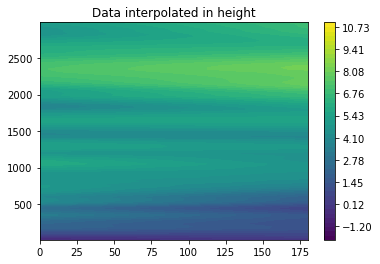

In [126]:
plt.contourf(np.arange((sim_length*60)+1),amr_height,u_amr.T, levels = np.linspace(-2,11))
plt.colorbar()
plt.title('Data interpolated in height')

In [127]:
# plt.contourf(np.arange(360), obs_height,dfp_['u_wind'].values.reshape(int(nvals/nh),nh).T,levels = np.linspace(-2,11))
# plt.ylim(0,3000)
# plt.colorbar()
# plt.title('Original Data')

In [128]:
p_amr = get_amr_var(dfp_, 'bar_pres', obs_height,amr_height)* 1000

T_amr = get_amr_var(dfp_, 'temp', obs_height,amr_height) + 273.15

dims = np.shape(T_amr)
for i in np.arange(dims[0]):
    for j in np.arange(dims[1]):
        T_amr[i,j] = T_amr[i,j]/get_exner(p_amr[i,j])

Text(0.5, 1.0, 'Data interpolated in height')

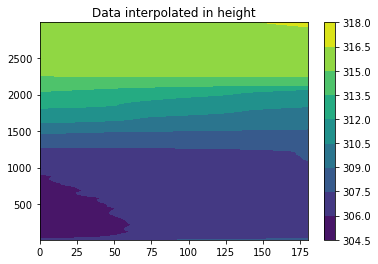

In [129]:
plt.contourf(np.arange((sim_length*60)+1),amr_height,T_amr.T)
plt.colorbar()
plt.title('Data interpolated in height')

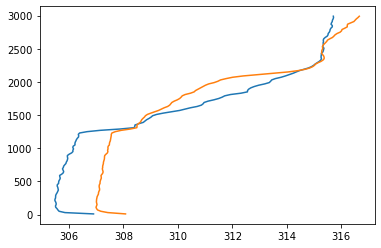

In [130]:
plt.plot(T_amr[0,:],amr_height)
plt.plot(T_amr[-1,:],amr_height)

# Create the forcing file

# Adjust filenames if needed 

In [131]:
forcing_file_name = 'forcing_{}_v0.nc'.format(date)
ncfile = nc.Dataset(forcing_file_name,mode='w', format='NETCDF4_CLASSIC')
# DIMENSIONS
amr_time = np.arange(T_amr.shape[0]) * 60.0
nheight = ncfile.createDimension('nheight',len(amr_height))
ntime = ncfile.createDimension('ntime', len(amr_time))
arraySize = ncfile.createDimension('arraySize', len(amr_time)* len(amr_height))

# VARIABLES

heights = ncfile.createVariable("heights","f8",("nheight",))
heights[:] = amr_height[:]

times  = ncfile.createVariable("times","f8",("ntime",))
times[:] = amr_time[:]

wrf_momentum_u = ncfile.createVariable("wrf_momentum_u", "f8", ("arraySize", ))

wrf_momentum_u[:] = u_amr.ravel(order='C')

wrf_momentum_v = ncfile.createVariable("wrf_momentum_v", "f8", ("arraySize", ))

wrf_momentum_v[:] = v_amr.ravel(order='C')

wrf_temperature = ncfile.createVariable("wrf_temperature", "f8", ("arraySize", ))
wrf_temperature[:] = T_amr.ravel(order='C')

f = scipy.interpolate.interp1d(flx_time_reset, tflux, fill_value='extrapolate')
tflux_interp = f(amr_time)

wrf_tflux = ncfile.createVariable("wrf_tflux", "f8", ("ntime", ))
wrf_tflux[:] = tflux_interp

ncfile.close()

# Initial Data file

In [132]:
initial_file_name = 'initial_{}_v0.nc'.format(date)
ncfile = nc.Dataset(initial_file_name,mode='w', format='NETCDF4_CLASSIC')
nheight = ncfile.createDimension('nheight',len(amr_height))
heights = ncfile.createVariable("heights","f8",("nheight",))
heights[:] = amr_height[:]

u = ncfile.createVariable("u", "f8", ("nheight"))

u[:] = u_amr[0, :]

v = ncfile.createVariable("v", "f8", ("nheight"))
v[:] = v_amr[0, :]

theta = ncfile.createVariable("theta", "f8", ("nheight"))
theta[:] = T_amr[0, :]

ncfile.close()

In [133]:
# Get w'T'

In [134]:
print(tflux_interp[0])

0.2835101882616679


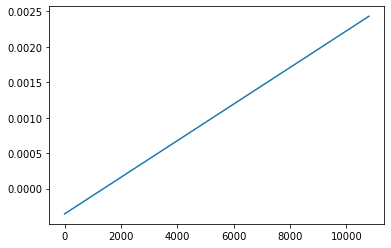

In [136]:
tgrad = np.zeros(len(amr_time))
tgrad2 = np.zeros(len(amr_time))
for i, time in enumerate(amr_time):
    tgrad[i] = (T_amr[i,-1]-T_amr[i,-2])/dz
#     tgrad2[i] = (T_amr[i,150]-T_amr[i,149])/dz
    
plt.plot(amr_time,tgrad)
# plt.plot(amr_time,tgrad2)

In [27]:
print(amr_time)

[    0.    60.   120.   180.   240.   300.   360.   420.   480.   540.
   600.   660.   720.   780.   840.   900.   960.  1020.  1080.  1140.
  1200.  1260.  1320.  1380.  1440.  1500.  1560.  1620.  1680.  1740.
  1800.  1860.  1920.  1980.  2040.  2100.  2160.  2220.  2280.  2340.
  2400.  2460.  2520.  2580.  2640.  2700.  2760.  2820.  2880.  2940.
  3000.  3060.  3120.  3180.  3240.  3300.  3360.  3420.  3480.  3540.
  3600.  3660.  3720.  3780.  3840.  3900.  3960.  4020.  4080.  4140.
  4200.  4260.  4320.  4380.  4440.  4500.  4560.  4620.  4680.  4740.
  4800.  4860.  4920.  4980.  5040.  5100.  5160.  5220.  5280.  5340.
  5400.  5460.  5520.  5580.  5640.  5700.  5760.  5820.  5880.  5940.
  6000.  6060.  6120.  6180.  6240.  6300.  6360.  6420.  6480.  6540.
  6600.  6660.  6720.  6780.  6840.  6900.  6960.  7020.  7080.  7140.
  7200.  7260.  7320.  7380.  7440.  7500.  7560.  7620.  7680.  7740.
  7800.  7860.  7920.  7980.  8040.  8100.  8160.  8220.  8280.  8340.
  8400

In [28]:
print(amr_height)

[  10.   30.   50.   70.   90.  110.  130.  150.  170.  190.  210.  230.
  250.  270.  290.  310.  330.  350.  370.  390.  410.  430.  450.  470.
  490.  510.  530.  550.  570.  590.  610.  630.  650.  670.  690.  710.
  730.  750.  770.  790.  810.  830.  850.  870.  890.  910.  930.  950.
  970.  990. 1010. 1030. 1050. 1070. 1090. 1110. 1130. 1150. 1170. 1190.
 1210. 1230. 1250. 1270. 1290. 1310. 1330. 1350. 1370. 1390. 1410. 1430.
 1450. 1470. 1490. 1510. 1530. 1550. 1570. 1590. 1610. 1630. 1650. 1670.
 1690. 1710. 1730. 1750. 1770. 1790. 1810. 1830. 1850. 1870. 1890. 1910.
 1930. 1950. 1970. 1990. 2010. 2030. 2050. 2070. 2090. 2110. 2130. 2150.
 2170. 2190. 2210. 2230. 2250. 2270. 2290. 2310. 2330. 2350. 2370. 2390.
 2410. 2430. 2450. 2470. 2490. 2510. 2530. 2550. 2570. 2590. 2610. 2630.
 2650. 2670. 2690. 2710. 2730. 2750. 2770. 2790. 2810. 2830. 2850. 2870.
 2890. 2910. 2930. 2950. 2970. 2990. 3010. 3030. 3050. 3070. 3090. 3110.
 3130. 3150. 3170. 3190.]
